In [1]:
import sys
from packaging import version
import sklearn


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ensembles"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Voting classifier

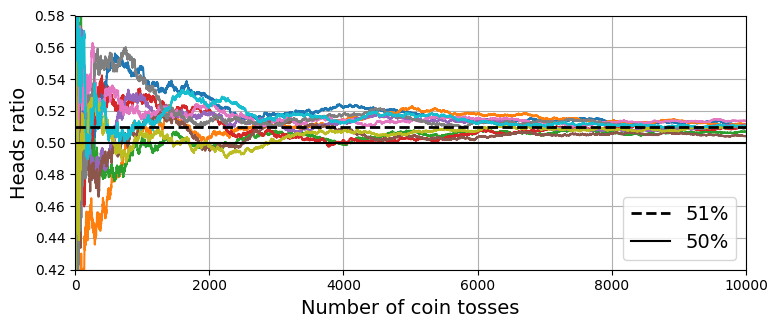

In [3]:
# extra code – this cell generates and saves Figure 7–3

import matplotlib.pyplot as plt
import numpy as np

heads_proba = 0.51
np.random.seed(42)
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8, 3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.grid()
save_fig("law_of_large_numbers_plot")
plt.show()

Building a voting classififer:

In [4]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples = 500,noise = 0.30, random_state= 42)
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 42)),
        ('rf', RandomForestClassifier(random_state = 42)),
        ('svc', SVC(random_state = 42,))
    ]
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [5]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.85
rf = 0.88
svc = 0.87


In [6]:
voting_clf.score(X_test, y_test)

0.87

## Bagging and Pasting
**Bagging (Bootstrap Aggregating)** e **Pasting** são técnicas de *ensemble learning*, onde vários modelos independentes são treinados para melhorar a performance do modelo final. Elas têm a mesma ideia de combinar múltiplos modelos para aumentar a precisão e reduzir o overfitting, mas a principal diferença entre elas está na forma como os dados são amostrados para treinar os modelos.

### **Bagging**

* **Objetivo:** Reduzir a variância do modelo e ajudar a evitar o overfitting.
* **Como funciona:**

  1. **Amostragem de Dados:** Para cada modelo individual, é gerado um subconjunto de dados de treino de forma *bootstrap*, ou seja, os dados são amostrados com reposição. Isso significa que alguns exemplos de dados podem ser repetidos, e outros podem ser deixados de fora.
  2. **Treinamento dos Modelos:** Cada modelo treinado recebe um subconjunto diferente de dados (com reposição), criando assim modelos diferentes.
  3. **Previsões Finais:** As previsões de todos os modelos são combinadas. Para problemas de classificação, utiliza-se uma votação majoritária entre os modelos. Para problemas de regressão, a média das previsões é calculada.

  **Exemplo:** Um modelo muito conhecido que utiliza o bagging é o **Random Forest**, que combina várias árvores de decisão, treinadas com diferentes subconjuntos dos dados.

### **Pasting**

* **Objetivo:** Também visa reduzir a variância, mas a principal diferença em relação ao Bagging é a forma de amostragem dos dados.
* **Como funciona:**

  1. **Amostragem de Dados:** Ao contrário do bagging, onde os dados são amostrados com reposição, no pasting os dados são amostrados **sem reposição**. Ou seja, cada modelo recebe um subconjunto único de dados, sem que um mesmo dado seja utilizado em mais de um modelo.
  2. **Treinamento dos Modelos:** Cada modelo é treinado com um subconjunto distinto de dados.
  3. **Previsões Finais:** Como no bagging, as previsões de todos os modelos são combinadas de acordo com o tipo de problema (votação majoritária ou média).

  **Exemplo:** O pasting é uma variação mais simples do bagging, onde os dados não têm sobreposição entre os modelos.

### **Principais Diferenças entre Bagging e Pasting:**

1. **Amostragem de Dados:**

   * **Bagging:** Amostragem com reposição (dados podem ser repetidos).
   * **Pasting:** Amostragem sem reposição (dados não se repetem).
2. **Robustez e Diversidade dos Modelos:**

   * **Bagging** tende a criar modelos mais diversos, porque a amostragem com reposição pode resultar em diferentes subconjuntos de dados, mesmo que alguns dados sejam repetidos.
   * **Pasting** cria modelos menos diversos, já que os dados não se repetem, mas são distribuídos entre os modelos sem sobreposição.

### **Resumindo:**

* **Bagging** é mais comum e cria modelos mais diversos, sendo particularmente eficaz para reduzir a variância e evitar o overfitting.
* **Pasting** é uma versão mais simples e direta, sem sobreposição de dados entre os modelos.

Ambas as técnicas são muito eficazes, mas o bagging geralmente é mais popular devido à sua robustez na redução de variância.


In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

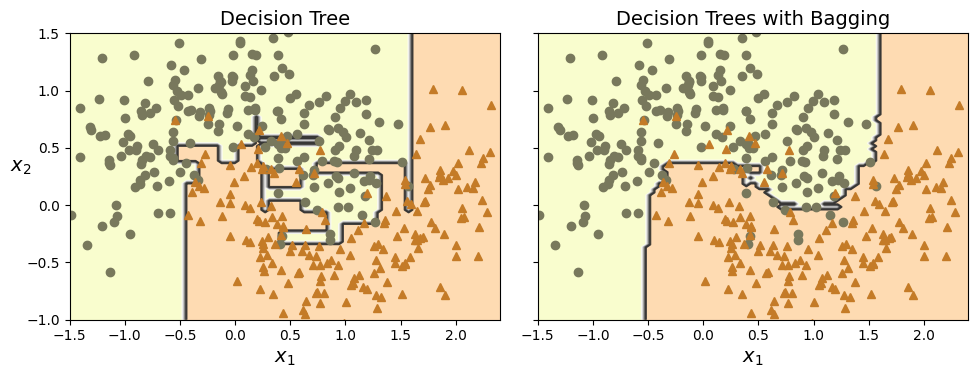

In [8]:
# extra code – this cell generates and saves Figure 7–5

def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

## Avaliação out-of-bag

A avaliação out-of-bag (OOB) é uma técnica utilizada em métodos de ensemble como o Bagging para estimar a performance do modelo sem a necessidade de um conjunto de validação separado. Em cada árvore do ensemble,\ parte dos dados de treino não é utilizada devido à amostragem com reposição (bootstrap). Esses exemplos "deixados de fora" (out-of-bag) podem ser usados para testar a árvore correspondente. A média das previsões OOB de todas as árvores fornece uma estimativa precisa da acurácia do modelo, similar à validação cruzada, mas sem custo computacional extra. Para ativar essa avaliação, basta definir `oob_score=True` ao criar o `BaggingClassifier` e acessar o atributo `oob_score_` após o treinamento.

In [9]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    bootstrap = True, n_jobs = -1, random_state = 42,
    oob_score= True,
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.91

In [10]:
#Checando para ver se o valor do oob_score é o mesmo que o score do modelo
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

## Random Forests
Random forests sao grupoamentos de arvores de decisao, geralmente treinadas por meio deo metodo bagging(as vezes pasting), e normalmente com o max_samples definido para o tamanho do conjunto de treinamento


In [11]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [12]:
#Random forest é equivalente a a bagging com DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features= "sqrt", max_leaf_nodes=16),
    n_estimators=500, n_jobs=-1, random_state=42    
)

In [13]:
#Verificando se o resultado é o mesmo
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
assert np.all(y_pred_rf == y_pred_bag), "Random Forest and Bagging with Decision Tree should yield the same predictions."

## Feature importance


In [15]:
from sklearn.datasets import load_iris

iris = load_iris( as_frame = True)
rnd_clf = RandomForestClassifier()
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.feature_names):
    print(round(score,2), name)

0.13 sepal length (cm)
0.02 sepal width (cm)
0.45 petal length (cm)
0.39 petal width (cm)


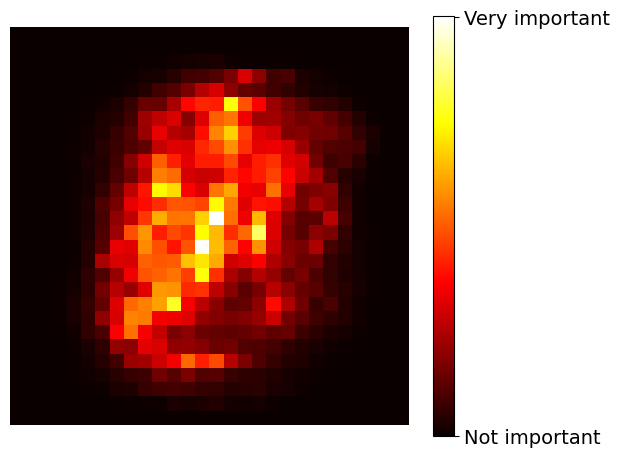

In [18]:
#Temos como saber tambem qual é o pixel mais importante de uma imagem
from sklearn.datasets import fetch_openml
X_mnist, y_mnist = fetch_openml("mnist_784", version=1, return_X_y=True)
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)
heatmap = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
save_fig("mnist_feature_importance_plot")
plt.show()

## Boosting
Boosting diz a respeito de qualquer metodo ensemble que pode combinar diversos aprndizes fracos em um aprendiz forte. A ideia geral da maioria dos metodos boosting é treinar preditores sequencialmente, cada um tentando corrigir seu predecessor. 

Dentre eles como os mais famosos temos o adaptive boosting = adaboost
e o gradient boosting


**ADABOOST :** Tecnica onde prestamos atenção nas instacias de terinamento que o antecessor nao sbajustoul. Resultndo em novos preditores que focam cada vez mais em casos dificieis. 

O algoritmo aumenta  o peso relativo de instancias de treinamento classficadas indevidamente. Em segunda ele treina um segundo classificador, usando os pesos atualizados, e novamente eftua as predições no conjunto de treinamento, atualiza os pesos da instancia e assim por diante


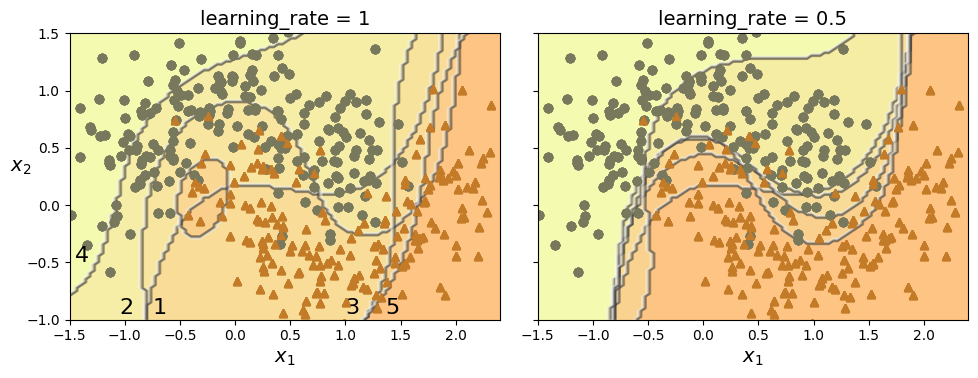

In [19]:
# extra code – this cell generates and saves Figure 7–8

m = len(X_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        error_weights = sample_weights[y_pred != y_train].sum()
        r = error_weights / sample_weights.sum()  # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r)  # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha)  # equation 7-3
        sample_weights /= sample_weights.sum()  # normalization step

        plot_decision_boundary(svm_clf, X_train, y_train, alpha=0.4)
        plt.title(f"learning_rate = {learning_rate}")
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=16)
        plt.text(-1.05, -0.95, "2", fontsize=16)
        plt.text(1.0, -0.95, "3", fontsize=16)
        plt.text(-1.45, -0.5, "4", fontsize=16)
        plt.text(1.36,  -0.95, "5", fontsize=16)
    else:
        plt.ylabel("")

save_fig("boosting_plot")
plt.show()

C:\Users\alvaro.careli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Text(0.5, 1.0, 'AdaBoost with Decision Stumps')

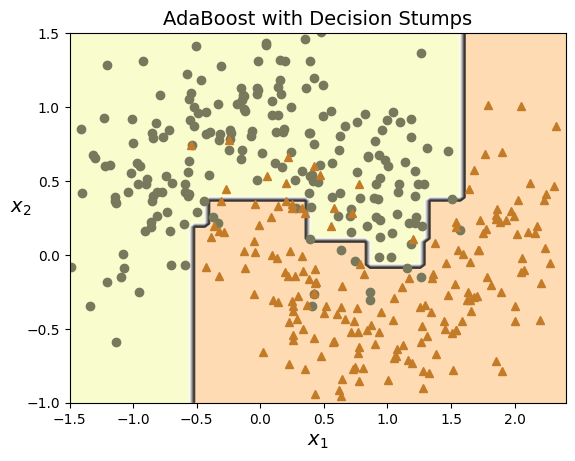

In [21]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators = 200,
    algorithm = 'SAMME', learning_rate = 0.5)

ada_clf.fit(X_train, y_train)
plot_decision_boundary(ada_clf, X_train, y_train)
plt.title("AdaBoost with Decision Stumps")

## Gradient boosting 
Faz um trabalho parecido com adaboosting, porem ao inves de concertar os pesos da instancia a cada iteração, como o adaboost, esse metodo tenta ajustar o preditor novo aos erros residuais cometidos pelo preditor anterior


In [23]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf.fit(X_train, y_train)

#Treinando o segundo DecisionTreeRegressor
y2 = y_train - tree_clf.predict(X_train)
tree_reg2 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_reg2.fit(X_train, y2)
y3 = y2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_reg3.fit(X_train, y3)
#Agrupamento com as tres arvores
y_pred = sum(tree.predict(X_train) for tree in (tree_clf, tree_reg2, tree_reg3))

In [24]:
#Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=42, learning_rate= 1.0)
"""
o hiperparametro learning_rate controla o quanto cada arvore vai 
influenciar no resultado final, ou seja, se for 1.0 cada arvore 
vai ter o mesmo peso, se for 0.5 cada arvore vai ter metade do 
peso -> Esse método tambem é chamado de "shrinkage" ou "step size"
"""
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

Para encontrar um numero ideal de árvores , podemos palicar early sttoping. Uma forma simples de implemnta-la  usando o metodo stage_predict(). O codigo abaixo treina um grupamento gbrt com 120 arvores, calcula o erro de validação em cada estagio do treinamento para encontrar o número ideal de arvores

In [25]:
# extra code – at least not in this chapter, it's presented in chapter 2

import pandas as pd
from sklearn.model_selection import train_test_split
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing_labels = train_set["median_house_value"]
housing = train_set.drop("median_house_value", axis=1)

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder 

hgb_reg = make_pipeline(
    make_column_transformer((OrdinalEncoder(), ["ocean_proximity"]),
                            remainder="passthrough"),
    HistGradientBoostingRegressor(categorical_features=[0], random_state=42)
)
hgb_reg.fit(housing, housing_labels)

C:\Users\alvaro.careli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\alvaro.careli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['ocean_proximity'])])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[0],
                                               random_state=42))])

In [27]:
# extra code – evaluate the RMSE stats for the hgb_reg model

from sklearn.model_selection import cross_val_score

hgb_rmses = -cross_val_score(hgb_reg, housing, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(hgb_rmses).describe()

count       10.000000
mean     47613.307194
std       1295.422509
min      44963.213061
25%      47001.233485
50%      48000.963564
75%      48488.093243
max      49176.368465
dtype: float64

## Stacking
metodo que toma como base uma simples idea : em vez de usar funções comuns (como a hard voting) para agragar as prediões de toos os preditores em um agrupamento

In [28]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42, probability=True))
    ],
    final_estimator=LogisticRegression(random_state=42),
    n_jobs=-1,
    cv = 5
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

In [29]:
stacking_clf.score(X_test, y_test)

0.9